In [1]:
from find_center import find_center
from plot_center_positions_vs_index import plot_center_positions
import time
import os
import json

h5_file_path = "/Users/xiaodong/Desktop/UOXs-3/UOXs.h5"
mask_path = "/Users/xiaodong/mask/pxmask.h5"

# Specify positions to process
selected_positions = None  # Process the first 10,000 frames
# selected_positions = list(range(1000))  # Process the first 10,000 frames

# Parameters
median_filter_size = 1
top_intensity_exc = 0
downsample_factor = 0.4
center_initial = [508, 514]
radial_bins = 500
num_slices = 3
plot = False
verbose = False

# Start timing
start_time = time.time()

# Call find_center with the updated parameters
find_center(
    h5_file_path=h5_file_path,
    mask_path=mask_path,
    selected_positions=selected_positions,
    plot=plot,
    verbose=verbose,
    median_filter_size=median_filter_size,
    top_intensity_exc=top_intensity_exc,
    downsample_factor=downsample_factor,
    center_initial=center_initial,
    radial_bins=radial_bins,
    num_slices=num_slices
)

# End timing
end_time = time.time()
total_time_seconds = end_time - start_time

# Prepare parameter information
parameters = {
    'h5_file_path': h5_file_path,
    'selected_positions': selected_positions,
    'median_filter_size': median_filter_size,
    'top_intensity_exc': top_intensity_exc,
    'downsample_factor': downsample_factor,
    'center_initial': center_initial,
    'radial_bins': radial_bins,
    'num_slices': num_slices,
    'total_processing_time_seconds': total_time_seconds
}

# Create a dictionary of input parameters for naming
params = {
    'median_filter_size': median_filter_size,
    'top_intensity_exc': top_intensity_exc,
    'downsample_factor': downsample_factor,
    'radial_bins': radial_bins,
    'num_slices': num_slices,
}

params_str = json.dumps(params, sort_keys=True)
params_str_clean = params_str.replace(" ", "").replace(":", "").replace(",", "_").replace("{", "").replace("}", "").replace("\"", "")
txt_file_name = f"params_{params_str_clean}.txt"
h5_file_name = f"beam_centers_{params_str_clean}.h5"

h5_dir = os.path.dirname(h5_file_path)

# Find the output directory where the parameters file was saved
output_dir = None
for root, dirs, files in os.walk(h5_dir):
    if txt_file_name in files:
        output_dir = root
        txt_file_path = os.path.join(root, txt_file_name)
        h5_file_output_path = os.path.join(root, h5_file_name)
        save_path = os.path.join(root, 'xy_vs_frame')
        break

if output_dir is None:
    print(f"Could not find the output directory containing {txt_file_name}", flush=True)
else:
    # Write parameters and processing time to the .txt file
    try:
        with open(txt_file_path, 'a') as txt_file:
            for key, value in parameters.items():
                txt_file.write(f"{key}: {value}\n")
        print(f"Parameters and processing time saved to {txt_file_path}", flush=True)
    except Exception as e:
        print(f"Failed to write parameters to text file: {e}", flush=True)
    
    h5_files = [
        h5_file_output_path,
        '/home/buster/UOX1/UOX1_min_10/CF_friedel/UOX1_min_10.h5',
    ]

    # Optional labels for each file
    labels = [
        'CF_intensity',
        'CF_friedel'
    ]

    # Call the plotting function
    plot_center_positions(
        h5_paths=h5_files,
        selected_positions=selected_positions,
        labels=labels,
        save_path=save_path
    )


OSError: [Errno 30] Read-only file system: '/path'

/home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/beam_centers19/beam_centers_downsample_factor0.4_median_filter_size1_num_slices3_radial_bins500_top_intensity_exc0.h5
Successfully read /home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/beam_centers19/beam_centers_downsample_factor0.4_median_filter_size1_num_slices3_radial_bins500_top_intensity_exc0.h5 with 5223 data points
Successfully read /home/buster/UOX1/UOX1_min_10/CF_friedel/UOX1_min_10.h5 with 5219 data points


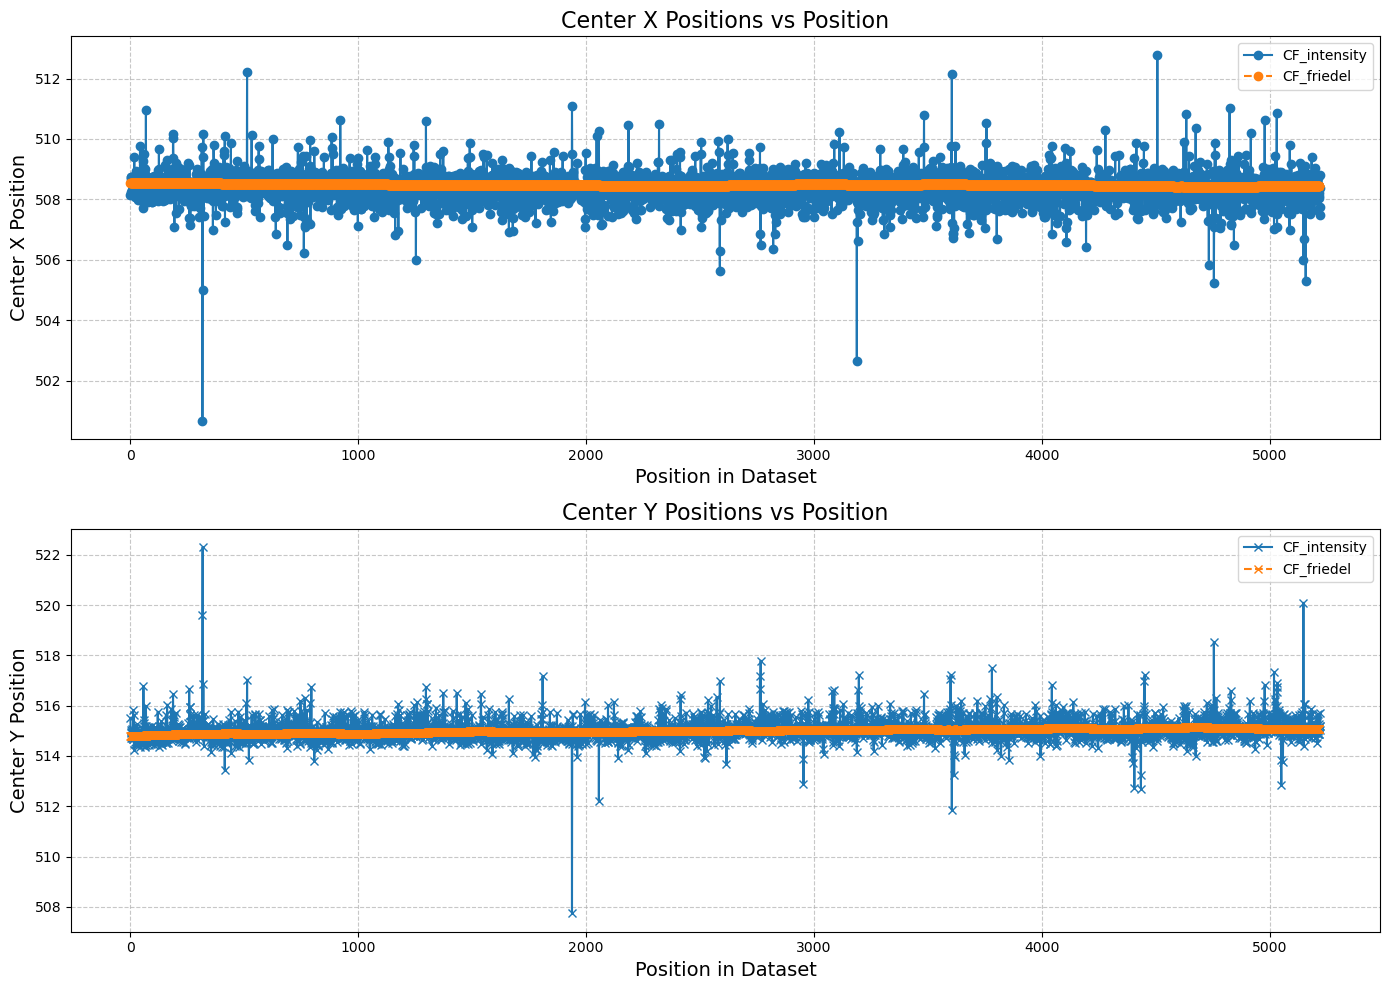

In [20]:
from plot_center_positions_vs_index import plot_center_positions
import os

# Ange sökvägen till din mapp
folder_path =     '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/beam_centers19'  # Byt ut med din mappsökväg

# Hitta alla .h5-filer i den angivna mappen (icke-rekursivt)
xy_h5_files = [f for f in os.listdir(folder_path) if f.endswith('.h5') and os.path.isfile(os.path.join(folder_path, f))]

# Skriv ut sökvägarna till hittade .h5-filer
for file in xy_h5_files:
    print(os.path.abspath(os.path.join(folder_path, file)))
    h5_files = [os.path.abspath(os.path.join(folder_path, file)),
    # '/home/buster/UOX1/UOX1_min_50/background/UOX1_min_50.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy2/UOX1_min_10.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy3/UOX1_min_10.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy4/UOX1_min_10.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity/UOX1_min_10.h5',
    '/home/buster/UOX1/UOX1_min_10/CF_friedel/UOX1_min_10.h5',
            ]

# Optional labels for each file
labels = [
        'CF_intensity',
        # 'CF_intensity_copy2',
        # 'CF_intensity_copy3',
        # 'CF_intensity_copy4',
        # 'CF_intensity',
        'CF_friedel'
           ]

# Define the indices you want to plot
selected_indices = list(range(0, 20000)) 

# Call the plotting function
plot_center_positions(
    h5_paths=h5_files,
    selected_indices=selected_indices,
    labels=labels,
    # save_path='selected_indices_plot.png'  # Optional: specify a path to save the plot
)
